# Case study on Supervised learning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dsIris = pd.read_excel ('iris.xls')

In [12]:
dsIris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing the Data

In [13]:
dsIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
The dataset contains 150 rows 5 columns.
SL,SW,Pl columns have missing values

In [14]:

dsIris["SL"] =dsIris["SL"].fillna(dsIris["SL"].mean())
dsIris["SW"] =dsIris["SW"].fillna(dsIris["SW"].mean())
dsIris["PL"] =dsIris["PL"].fillna(dsIris["PL"].mean())
dsIris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Boxplot of SL')

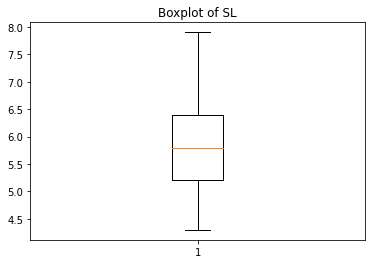

In [16]:
plt.boxplot(dsIris["SL"])
plt.title("Boxplot of SL")

Text(0.5, 1.0, 'Boxplot of SW')

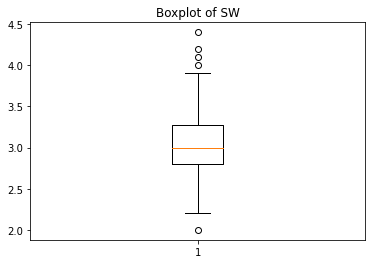

In [17]:
plt.boxplot(dsIris["SW"])
plt.title("Boxplot of SW")

In [18]:
Q1 = dsIris['SW'].quantile(0.25)
Q3 = dsIris['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
SW_outliers = dsIris[(dsIris['SW'] < Q1 - whisker_width*IQR) | (dsIris['SW'] > Q3 + whisker_width*IQR)]
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
dsIris['SW']=np.where(dsIris['SW']>upper_whisker,upper_whisker,np.where(dsIris['SW']<lower_whisker,lower_whisker,dsIris['SW']))


In [19]:
Q1 = dsIris['SW'].quantile(0.25)
Q3 = dsIris['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
SW_outliers = dsIris[(dsIris['SW'] < Q1 - whisker_width*IQR) | (dsIris['SW'] > Q3 + whisker_width*IQR)]
SW_outliers.head()

,SL,SW,PL,PW,Classification


Text(0.5, 1.0, 'Boxplot of PL')

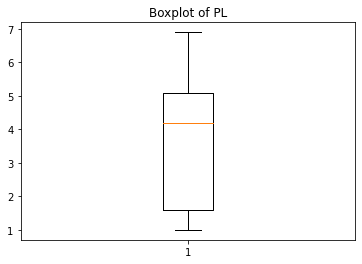

In [20]:
plt.boxplot(dsIris["PL"])
plt.title("Boxplot of PL")

Text(0.5, 1.0, 'Boxplot of PW')

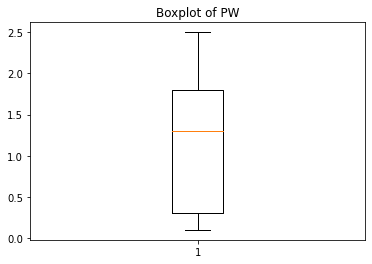

In [21]:
plt.boxplot(dsIris["PW"])
plt.title("Boxplot of PW")

In [22]:
dsIris.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099985,0.831400,0.800726
SW,-0.099985,1.000000,-0.412278,-0.338289
PL,0.831400,-0.412278,1.000000,0.936389
PW,0.800726,-0.338289,0.936389,1.000000


In [ ]:
Since the correlation between PW and PL is .96 we can remove one column

In [23]:
dsIrisNew = dsIris
dsIrisNew.drop("PW",axis=1)
dsIrisNew

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


# Label encoding the species

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dsIrisNew["Classification"] = le.fit_transform(dsIrisNew["Classification"])
dsIrisNew.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Spliting the data 

In [30]:
from sklearn.model_selection import train_test_split
X = dsIrisNew.drop(columns=['Classification'])
Y = dsIrisNew['Classification']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy :",model.score(x_test,y_test)*100)

Accuracy : 93.33333333333333


# Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))


Accuracy : 0.9666666666666667


# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
acc_values= []
neighbors =np.arange(3,15)
for k in neighbors :
    classifier = KNeighborsClassifier(n_neighbors = k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [46]:
acc_values

[0.9,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667]

In [ ]:
K =4,12,14 is giving high accuracy

# Random Forest and KNN are giving same accuracy

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
DecisionTreeClassifier(class_weight = None,criterion ='gini',max_depth = None,max_features=None,max_leaf_nodes=None,
                      min_impurity_decrease = 0.0,min_impurity_split = None,
                      min_samples_leaf=1,min_samples_split=2,
                      min_weight_fraction_leaf=0.0,random_state = None,
                      splitter='best')
y_pred = dt_model.predict(x_test)
print ("Accuracy is :",metrics.accuracy_score(y_test,y_pred))

Accuracy is : 0.9666666666666667


# Decision Tree is also giving the same accuracy 